## Keras model - DenseNet 
---- 

* **features**

> - DenseNet implementation 
>  -  two Dense block 

### Load Dataset 

In [1]:
import numpy as np 
import pickle 

# load dataset 
# with open('../sample_image/sample560_crop_df.bin', 'rb') as f :
#     crop_img = pickle.load(f)

with open('../sample_image/final_df.bin', 'rb') as f :
    crop_img = pickle.load(f)

    
# X = np.array([i for i in crop_img.crop_img_03])
X = np.array([i for i in crop_img.crop_images])
y = crop_img.weight.values

idx = list(np.random.choice(range(len(X)), int(len(X) * 0.8), replace=False))
test_idx = list(set(list(range(len(X)))) - set(idx))

X_train = X[idx]
y_train = y[idx]

X_test = X[test_idx]
y_test = y[test_idx]

In [2]:
X.shape

(560, 250, 550, 3)

### Parameters 

In [3]:
BATCH_SIZE = 24 
LOSS = "mean_squared_error"
OPTIMIZER = ["adagrad", "adadelta", "adam", "adamax", "rmsprob"]

### Model Architecture

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.engine.input_layer import Input
from keras.models import Model
from keras import regularizers 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate, AveragePooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.regularizers import l2


def DenseNet():
    
    inputs = Input(shape=(250, 550, 3))
    
    conv_1 = Conv2D(16, (7, 7), strides=2, padding='same')(inputs)
    act_1 = Activation('relu')(conv_1)
    max_pool = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(act_1)
    
    ##### DENSE BLOCK 1 #####
    
    bn_1 = BatchNormalization()(max_pool)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 =concatenate([act_2, max_pool], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 =concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 =concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 =concatenate([act_2, merged_3], axis=-1)
    
    ###### Transition layer 1 #####

    conv_1 = Conv2D(32, (1, 1), padding='same')(merged_4)
    act_1 = Activation('relu')(conv_1)
    avg_p_1 = AveragePooling2D(strides=2)(act_1)
    
    
    ##### DENSE BLOCK 2 #####
    
    bn_1 = BatchNormalization()(avg_p_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 =concatenate([act_2, avg_p_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 =concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 =concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 =concatenate([act_2, merged_3], axis=-1)
    
    ## Dense Layer with GlobalAveragePooling
    
    global_avg_p = GlobalAveragePooling2D()(merged_4)
    denselayer = Dense(100, activation='elu', kernel_regularizer=l2(0.001))(global_avg_p)
    output = Dense(1)(denselayer)
    
    
    model = Model(inputs=[inputs], outputs=[output])
        
    return model 


### Model fitting 

In [6]:
from keras.utils.training_utils import multi_gpu_model

model = DenseNet()
# model = multi_gpu_model(model, gpus=2)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [7]:
%%time
hist = model.fit(X_train, y_train, epochs=150, batch_size=24, validation_data=(X_test, y_test), verbose=2)

Train on 448 samples, validate on 112 samples
Epoch 1/150
 - 12s - loss: 3635.2755 - mean_absolute_error: 49.9266 - val_loss: 261.1965 - val_mean_absolute_error: 14.2446
Epoch 2/150
 - 5s - loss: 386.4527 - mean_absolute_error: 15.9711 - val_loss: 445.7536 - val_mean_absolute_error: 18.0795
Epoch 3/150
 - 5s - loss: 291.0254 - mean_absolute_error: 14.4963 - val_loss: 205.9450 - val_mean_absolute_error: 12.3364
Epoch 4/150
 - 5s - loss: 224.5075 - mean_absolute_error: 13.1937 - val_loss: 238.9691 - val_mean_absolute_error: 13.7106
Epoch 5/150
 - 5s - loss: 151.0994 - mean_absolute_error: 10.5514 - val_loss: 7814.3300 - val_mean_absolute_error: 60.2710
Epoch 6/150
 - 5s - loss: 99.1900 - mean_absolute_error: 7.6587 - val_loss: 2340.1262 - val_mean_absolute_error: 30.9384
Epoch 7/150
 - 4s - loss: 79.3586 - mean_absolute_error: 6.9646 - val_loss: 107.1776 - val_mean_absolute_error: 8.3169
Epoch 8/150
 - 5s - loss: 47.5619 - mean_absolute_error: 5.4144 - val_loss: 87.2060 - val_mean_absolu

 - 5s - loss: 15.1487 - mean_absolute_error: 3.2170 - val_loss: 29.8161 - val_mean_absolute_error: 4.6692
Epoch 70/150
 - 5s - loss: 14.7139 - mean_absolute_error: 3.1057 - val_loss: 619.2099 - val_mean_absolute_error: 24.4207
Epoch 71/150
 - 4s - loss: 25.7986 - mean_absolute_error: 4.2489 - val_loss: 173.6261 - val_mean_absolute_error: 12.6159
Epoch 72/150
 - 5s - loss: 19.9927 - mean_absolute_error: 3.6609 - val_loss: 209.1853 - val_mean_absolute_error: 13.3653
Epoch 73/150
 - 5s - loss: 22.6513 - mean_absolute_error: 3.8511 - val_loss: 13.6161 - val_mean_absolute_error: 2.8825
Epoch 74/150
 - 5s - loss: 25.2751 - mean_absolute_error: 3.9169 - val_loss: 21.6327 - val_mean_absolute_error: 3.9761
Epoch 75/150
 - 5s - loss: 14.2317 - mean_absolute_error: 3.0852 - val_loss: 33.5531 - val_mean_absolute_error: 4.8000
Epoch 76/150
 - 5s - loss: 25.4527 - mean_absolute_error: 4.0654 - val_loss: 171.1804 - val_mean_absolute_error: 12.5114
Epoch 77/150
 - 5s - loss: 21.6739 - mean_absolute_er

Epoch 138/150
 - 4s - loss: 8.2437 - mean_absolute_error: 2.2822 - val_loss: 39.9041 - val_mean_absolute_error: 5.3538
Epoch 139/150
 - 5s - loss: 9.1916 - mean_absolute_error: 2.4694 - val_loss: 38.2107 - val_mean_absolute_error: 5.4670
Epoch 140/150
 - 5s - loss: 17.5607 - mean_absolute_error: 3.3524 - val_loss: 98.8824 - val_mean_absolute_error: 9.3362
Epoch 141/150
 - 4s - loss: 22.7097 - mean_absolute_error: 3.9163 - val_loss: 18.9884 - val_mean_absolute_error: 3.6428
Epoch 142/150
 - 5s - loss: 15.5764 - mean_absolute_error: 3.1780 - val_loss: 101.9480 - val_mean_absolute_error: 9.3299
Epoch 143/150
 - 5s - loss: 21.4495 - mean_absolute_error: 3.7861 - val_loss: 15.8797 - val_mean_absolute_error: 3.1314
Epoch 144/150
 - 5s - loss: 11.5530 - mean_absolute_error: 2.7355 - val_loss: 94.2173 - val_mean_absolute_error: 8.3077
Epoch 145/150
 - 5s - loss: 15.1691 - mean_absolute_error: 3.1577 - val_loss: 27.4441 - val_mean_absolute_error: 4.4442
Epoch 146/150
 - 5s - loss: 9.9219 - mean

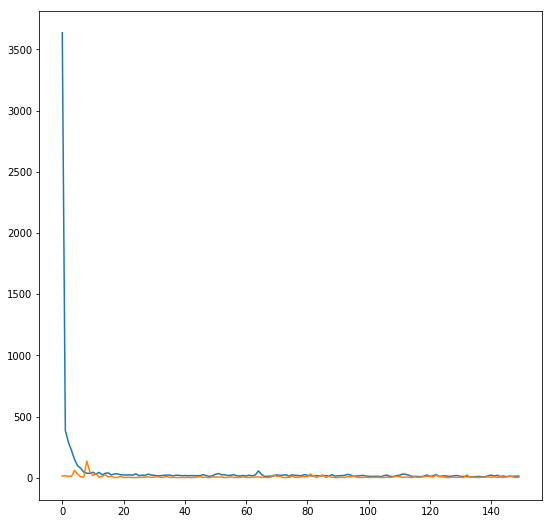

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_mean_absolute_error"])
plt.show()

### Prediction

In [9]:
r = 2
print("prediction : {}, Truth : {} ".format(model.predict(X_test)[r], y_test[r]))

prediction : [92.99408], Truth : 92.77 


### Save the model 

In [10]:
from keras.models import load_model
import pickle
import h5py

model.save('DenseNet_0720_150Epochs.hdf5')
del model 